<a href="https://colab.research.google.com/github/ji0-k/AI_26/blob/main/05_02_%EA%B5%90%EC%B0%A8%EA%B2%80%EC%A6%9D_%EA%B7%B8%EB%A6%AC%EB%93%9C%EC%84%9C%EC%B9%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
# 지금까지 배운 알고리즘은 훈련세트와 테스트세트를 나누어평가를 진행하는데
# 근데 결국 테스트세트로 평가를 하면 테스트세트에 맞는 모델이 만들어 지는 결론이 나온다
# 테스트 세트에 일반화 성능을 올바르게 예측하려면 가능한 한
# 테스트세트를 사용하지 말아야 한다.
# 모델을 만들고 나서 마지막에 딱 한번 사용하는 것이 좋다.

# 결정트리에서 배운 max_depth=3으로 테스트 해봤는데 이것이 최선일까?
# 결정트리에서 max_depth 매개변수를 사용한 하이퍼파라미터 튜닝 해보자.

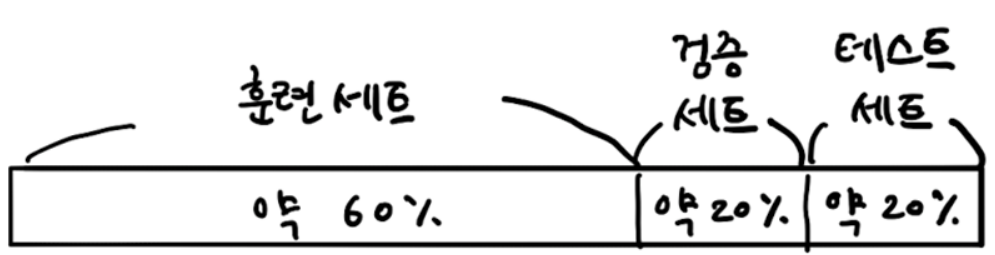

In [44]:
# 검증세트
# 테스트 세트를 사용하지 않으려면 모델이 과대적합인지
# 과소적합인지 판단하기 어렵다.
# 테스트 세트를 사용하지 않고 측정하는 간단한 방법은
# 훈련세트를 또 나누는 것이다.
# 훈련세트 60%, 검증세트 20%, 테스트세트 20% -> 실무에서 많이 쓰는 기법

# 테스트하고 싶은 매개변수를 바꿔가면서 가장 좋은 모델이 나올 수 있음
# 이 매개변수를 사용해 훈련세트와 검증세트를 합쳐
# 전체 훈련 데이터에서 모델을 다시 훈련함
# 마지막 테스트에서 최종 점수를 평가함
# 훈련세트에서 모델을 훈련하고 검증세트로 모델을 평가함.
# 마지막 세트에서 테스트세트를 이용해 최종 점수를 평가함.

In [45]:
# 1.교차 검증 (Cross Validation):
# 보통 훈련 세트에서 또다시 '검증 세트'를 떼어내어 모델을 평가하는데, 데이터가 적으면 검증 결과가 불안정할 수 있습니다.
# 교차 검증은 데이터를 여러 조각으로 나눠서 번갈아가며 검증에 사용하여, 모델의 성능을 훨씬 더 객관적으로 측정하게 해줍니다.

# 2 그리드 서치 (Grid Search):
# 결정 트리의 max_depth처럼 사람이 직접 설정해야 하는 값을 하이퍼파라미터라고 합니다.
# 그리드 서치는 "내가 준 후보 값들 중에서 가장 성능이 좋은 최적의 하이퍼파라미터 조합을 자동으로 찾아줘!"라고 컴퓨터에게 시키는 도구입니다.

# 3.
# 훈련 세트(sub): 모델을 가르치는 용도 (공부하기)
# 검증 세트(val): 공부가 잘됐는지 중간 고사 보는 용도 (하이퍼파라미터 튜닝)
# 테스트 세트(test): 최종 수능 시험 (실전 투입 전 마지막 성능 확인)

In [46]:
import pandas as pd

# 1. 온라인에서 와인 데이터셋(CSV)을 읽어와 데이터프레임으로 저장합니다
wine = pd.read_csv('https://bit.ly/wine_csv_data')

# 2. 특성 데이터(알코올, 당도, pH)와 정답 데이터(class: 화이트/레드)를 넘파이 배열로 변환합니다.
data = wine[['alcohol','sugar','pH']].to_numpy() # 입력데이터(특성)
target =wine['class'].to_numpy() #타겟데이터(정답)

from sklearn.model_selection import train_test_split
# 3. 전체 데이터를 훈련 세트와 테스트 세트로 나눕니다.

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)
# test_size=0.2 : 전체의 20%를 최종 성능 확인용(테스트 세트)으로 떼어둡니다.
# random_state=42 : 실행할 때마다 결과가 달라지지 않도록 무작위 수를 고정합니다.
# 원본 데이터 6497개 중 약 80%인 5197개가 훈련용, 20%인 1300개가 테스트용이 됩니다.

print(train_input.shape, test_input.shape) # 4. 분할된 데이터의 차원(개수, 특성 수)을 확인합니다.


(5197, 3) (1300, 3)


In [47]:
# 검증용데이터 20% 생성
sub_input, val_input, sub_target, val_target = train_test_split(train_input, train_target, test_size = 0.2, random_state=42)
# 훈련 세트(train_input)를 다시 8:2로 나누어 '실제 훈련용(sub)'과 '검증용(val)'으로 분리합니다.
# test_size=0.2를 통해 훈련 데이터 5197개 중 20%인 1040개를 검증 세트로 떼어냅니다.
print(sub_input.shape, val_input.shape)
# 분할 후 데이터의 크기를 확인합니다.
# sub_input: 실제 모델 학습에 사용하는 데이터 (4157개)
# val_input: 학습 중 모델의 성능을 중간 점검하는 데이터 (1040개)

(4157, 3) (1040, 3)


In [48]:
from sklearn.tree import DecisionTreeClassifier
# sub_input, sub_target과 val_input, val_target을 사용해 모델을 만들고 평가함

dt= DecisionTreeClassifier(random_state=42)
# 1. 결정 트리 모델 객체를 생성합니다.
# random_state=42는 실행할 때마다 결과가 달라지지 않게 '난수'를 고정하는 역할이에요.
dt.fit(sub_input,sub_target)
# 2. 모델을 학습(fit)시킵니다.
# 훈련 세트(sub_input)와 그에 맞는 정답(sub_target)을 주어 규칙을 배우게 합니다.

print(dt.score(sub_input,sub_target))
# 3. 훈련 세트에서의 성능 점수(정확도)를 확인합니다.
# 출력 결과 약 99.71%가 나옵니다. 모델이 훈련 데이터를 거의 다 외웠다는 뜻이에요. (과대적합
print(dt.score(val_input, val_target))
# 4. 검증 세트에서의 성능 점수를 확인합니다.
# 출력 결과 약 86.44%가 나옵니다. 훈련 점수보다 약 13%나 낮죠?
# 이는 모델이 '새로운 데이터(검증용)'에는 약하다는 증거입니다.

# 5. [결론] 두 점수 차이가 크므로, 나무의 깊이(max_depth) 같은 매개변수를 조절해서
# 훈련 점수는 조금 낮아지더라도 검증 점수를 끌어올리는 '일반화' 과정이 필요합니다.

0.9971133028626413
0.864423076923077


In [49]:
# 검증세트를 만드느냐고 훈련 세트가 줄었음. (이럴때 많은 데이터를 훈련하면 좋은 결과가 나옴)
# 교차 검증 : 검증 세트를 떼어 내어 평가하는 과정을 여러번 반복함
# [훈련세트, 훈련세트, 검증세트]
# [훈련세트, 검증세트, 훈련세트]
# [검증세트, 훈련세트, 훈련세트] -> 패리티 방식(3-폴드 교차 검증)
# 5-폴드, 10-폴드도 있음
# 사이킷런에는 cross_validate()라는 교차 검증 함수를 사용

In [50]:
# 1. 교차 검증을 위한 도구를 임포트합니다.
from sklearn.model_selection import cross_validate
import numpy as np # 평균 계산을 위해 함께 임포트합니다.

# 2. 교차 검증을 실행합니다.
scores = cross_validate(dt, train_input,train_target)
# dt: 사용할 결정 트리 모델
# train_input, train_target: '검증 세트'로 나누기 전의 전체 훈련 데이터를 넣습니다.
# 내부적으로 데이터를 5개 조각(Fold)으로 나누어 5번 학습과 검증을 반복합니다.
# scores = cross_validate(dt, train_input, train_target, cv=5)
# cv 매개변수를 이용해 폴드 수를 변경함 cv=5(기본값)

# 3. 수행 결과가 담긴 딕셔너리 객체를 확인합니다.
print(scores)
# 학습 시간(fit_time), 검증 시간(score_time), 검증 점수(test_score)

# 4. 5번의 교차 검증 점수의 평균을 냅니다.
print(np.mean(scores['test_score']))
# 5개의 검증 점수를 평균을 내어 최종 점수를 얻는다. 85.53%
# 이것이 모델의 최종 '진짜 실력'이라고 볼 수 있습니다.

{'fit_time': array([0.01019454, 0.00884366, 0.00888276, 0.00876617, 0.00844407]), 'score_time': array([0.00132632, 0.00118804, 0.00117493, 0.00110817, 0.00110793]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}
0.855300214703487


In [51]:
# 주의 : cross_validate()는 훈련세트를 섞어서 폴드를 나누지 않음 -> 분할기 사용(splitter)
# 앞서 우리는 tarin_test_split() 함수로 전체 데이터를 섞은 후 훈련세트를 준비했음
# 만약 교차 검증을 할 때 훈련세트를 섞으려면 분할기(splitter)를 지정해야 한다.

# 사이킷런의 분할기는 교차검증에서 폴드를 어떻게 나눌지를 결정함
# cross_validate()는 기본적으로 회귀모델인 KFold 분할기를 사용함
# 분류 모델일 경우 타킷 클래스를 골고루 나누기 위해서 StratifiedKFold를 사용한다.

In [52]:
from sklearn.model_selection import StratifiedKFold
# StratifiedKFold는 타깃(정답)의 비율을 원래 데이터와 동일하게 유지하면서 조각을 나눕니다.
# 분류(Classification) 모델에서는 필수적으로 사용되는 기법입니다

# 1. splitter라는 이름으로 StratifiedKFold 객체를 만듭니다.
splitter = StratifiedKFold()
# 기본적으로 5-폴드(n_splits=5)로 설정됩니다.

# 2. 교차 검증을 실행합니다.
scores = cross_validate(dt, train_input, train_target, cv= splitter)
# cv=splitter: "그냥 나누지 말고, 내가 설정한 splitter 방식(계층화)으로 나눠줘"라고 지정합니다.
# train_input과 train_target을 넣어 데이터의 정답 비율을 참고하게 합니다.

# 3. 5번의 교차 검증 결과(딕셔너리 형태)를 출력합니다.
print(scores)

# 왜 splitter를만드나?
# 사실 앞선 코드에서 cv를 생략해도 분류 모델이면 자동으로 StratifiedKFold가 작동합니다.
# 하지만 조각 개수를 늘리고 싶거나(n_splits=10), 데이터를 섞고 싶을 때(shuffle=True)는
# 위 코드처럼 객체를 따로 만들어 넣어줘야 세밀한 조정이 가능합니다.

print(np.mean(scores['test_score']))
# 훈련 결과: 출력된 test_score 값들이 이전보다 더 안정적으로(비슷한 수치로) 나온다면,
# 데이터가 골고루 잘 섞여서 검증되었다는 뜻입니다.

{'fit_time': array([0.00958633, 0.00964355, 0.00989199, 0.0153842 , 0.0126009 ]), 'score_time': array([0.00118184, 0.00171733, 0.00148392, 0.00194669, 0.001647  ]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}
0.855300214703487


In [53]:
# 왜 splitter 사용전과 후가 똑같은 평균인지 질문함
# : splitter를 직접 만들어서 세부 옵션을 건드렸을 때 비로소 점수가 달라집니다

# 1. 조각 개수나 섞기 옵션을 변경하고 싶을 때 직접 객체를 생성합니다.
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
# n_splits=10: 5번이 아니라 10번 시험을 보겠다!
# shuffle=True: 데이터를 나누기 전에 한 번 골고루 섞겠다!

# 2. 변경된 설정으로 교차 검증 실행
scores = cross_validate(dt, train_input, train_target, cv=splitter)

# 3. 평균 점수 확인
print(np.mean(scores['test_score']))
# 조각 개수가 달라지고 데이터 섞기가 포함되었으므로, 이때는 점수가 이전과 다르게 나옵니다.

# cross_validate(cv=None) 일 때:
   # 사용하는 모델이 분류(Classification) 모델이면?
   #      → 자동으로 StratifiedKFold를 사용하여 데이터를 나눕니다.
   # 사용하는 모델이 회귀(Regression) 모델이면?
   #      → 자동으로 일반 KFold를 사용하여 데이터를 나눕니다.

0.8574181117533719


In [54]:
# 데이터 섞기(shuffle)와 폴드 개수(n_splits) 조절을 통해 교차 검증을 한 단계 더
# n_splits=10: 데이터를 5개가 아닌 10개 조각으로 나눕니다.
#  더 많은 검증 과정을 거치므로 모델의 성능 평가가 더 정밀해지지만, 연산 시간은 그만큼 늘어납니다.
# shuffle=True: 데이터를 나누기 전에 전체적으로 한 번 뒤섞습니다.
#  만약 원본 데이터가 특정 순서(예: 날짜순, 당도순)로 정렬되어 있다면, 이를 섞어줘야 각 조각이 전체 데이터를 잘 대표할 수 있습니다.
from sklearn.model_selection import StratifiedKFold, cross_validate
import numpy as np

# 1. 10개의 조각으로 나누고, 데이터를 미리 섞는 상세 설정의 splitter를 만듭니다.
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
# n_splits=10: 교차 검증을 10번 수행하도록 설정합니다.
# shuffle=True: 데이터를 나누기 전에 무작위로 섞어 데이터의 편향을 방지합니다.
# random_state=42: 섞는 순서를 고정하여 코드를 다시 실행해도 같은 결과를 얻게 합니다.

# 2. 설정한 splitter를 사용하여 교차 검증을 수행합니다.
scores = cross_validate(dt, train_input, train_target,cv=splitter)
# 이제는 5번이 아니라 10번의 학습과 검증이 반복됩니다.

# 3. 10번의 교차 검증 결과가 담긴 딕셔너리를 출력합니다.
print(scores)
# test_score 항목에 10개의 점수가 들어있을 것입니다.

# 4. 10번의 검증 점수를 평균 내어 최종 성능을 확인합니다.
print(np.mean(scores['test_score']))
# 5-폴드 결과(85.53%)와는 조금 다른 85.74%라는 결과가 나옵니다.
# 데이터가 섞이고 평가 횟수가 늘어났기 때문에 더 믿을만한 '평균 점수'입니다.

{'fit_time': array([0.01145124, 0.00985265, 0.00971365, 0.0097425 , 0.00972033,
       0.00996947, 0.01086569, 0.00995469, 0.00971818, 0.00974607]), 'score_time': array([0.00115848, 0.00114584, 0.0011096 , 0.00145674, 0.00122309,
       0.00154209, 0.00208211, 0.00131631, 0.00128436, 0.0012908 ]), 'test_score': array([0.83461538, 0.87884615, 0.85384615, 0.85384615, 0.84615385,
       0.87307692, 0.85961538, 0.85549133, 0.85163776, 0.86705202])}
0.8574181117533719


In [55]:
# 결정트리의 매개변수 값을 바꿔가며 가장 좋은 성능이 나오는 모델을 찾아봐야 함
# 테스트 세트를 사용하지 않고 교차 검증을 통해서 좋은 모델을 골라야 함

# 하이퍼파라미터 튜닝
# 모델 파라미터 : 머신런닝 모델이 학습하는 파라미터
# 하이퍼파라미터 : 사용자가 지정해야만 하는 파라미터
# 하이퍼파라미터 튜닝 : 라이브러리가 제공하는 기본값을 그대로 사용해 모델을 훈련
# 그 다음 검증세트의 점수나 교차 검증을 통해서 매개변수를 조금씩 변경 1~2, 5~6개의 매개변수를 제공
# AutoML : 사람의 개입없이 하이퍼파라미터 튜닝을 자동으로 수행하는 기술

# Max_depth 를 최적으로 고정하고 min_sample_split을 바꿔가며 최적의 값을 찾는다면 값이 함께 변경됨
# -> 두개의 매개변수를 동시에 바꿔가며 최적의 값을 찾아야 함 -> 다중 for문을 사용해야 됨(복잡해 짐)
# 사이킷런에서 제공하는 그리드 서치(Grid Search)가 제공 GridSearchCV


In [56]:
#1. 그리드 서치(Grid Search)란?
# 우리가 결정 트리의 깊이나 불순도 감소량을 일일이 숫자로 넣어보며 점수를 확인하는 것은 매우 번거롭습니다.
# 그리드 서치는 우리가 준 후보 리스트(params)를 격자(Grid)처럼 만들어서
# 모든 조합을 다 테스트해보고, 가장 성적이 좋은 모델을 골라주는 자동화 도구입니다.

In [57]:
from sklearn.model_selection import GridSearchCV #교차 검증을 동시에 수행하는 도구

# 1. 탐색할 하이퍼파라미터와 그 후보군을 딕셔너리로 만듭니다.
params = {'min_impurity_decrease': [0.0001,0.0002, 0.0003, 0.0004, 0.0005]}
# min_impurity_decrease: 노드를 분할하기 위한 최소 불순도 감소량
# (이 수치보다 작게 불순도가 감소한다면 더 이상 가지를 치지 않습니다.)

# 2. 그리드 서치 객체를 생성합니다.
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
# DecisionTreeClassifier(random_state=42): 분석할 기본 모델
# params: 위에서 정의한 매개변수 후보 리스트
# n_jobs=-1: 모든 CPU 코어를 사용하여 병렬로 빠르게 계산합니다.

# 3. 그리드 서치를 이용한 훈련을 시작합니다.
gs.fit(train_input, train_target)
# 이 한 줄로 다음 과정이 자동으로 진행됩니다.
# (1) min_impurity_decrease 값을 5번 바꿔가며 테스트
# (2) 각 값마다 5-폴드 교차 검증 수행 (총 5 * 5 = 25번 학습)


GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [58]:
# 4. 최적의 모델 추출
dt = gs.best_estimator_ # 최적의 설정으로 학습이 끝난 모델 객체
# 사이킷런의 그리드 서치는 단순히 최적의 값만 알려주는 것이 아니라,
# 검증 점수가 가장 높은 매개변수 조합으로 전체 훈련 세트에서 '자동으로' 다시 모델을 훈련하여 저장해둡니다.
print(dt.score(train_input, train_target)) # 최적 모델의 훈련 점수 확인

print(f"그리드 서치를 통해 찾은 최적의 모델의 정확도 : {gs.score(train_input, train_target)*100:.2f}%")
# gs.best_estimator_가 담긴 dt 객체를 사용하거나 gs 객체를 직접 사용해도 됩니다.
# 해석: 이 점수는 모델이 '학습'한 데이터에 대한 점수이므로 보통 매우 높게 나옵니다.

# 2. 최적의 매개변수 조합 확인
print(f"최적의 매개변수 : {gs.best_params_}") # 암기
# 각 매개변수에서 수행한 교차 검증의 평균 점수는 cv_results_ 속성의 'mean_test_score'키에 저장되어 있다.
# 최적의 매개변수 : {'min_impurity_decrease': 0.0

# 3. 모든 후보군에 대한 교차 검증 평균 점수 조회
print(gs.cv_results_['mean_test_score'])
# 조회 이유:
# (1) 1등 점수와 2, 3등 점수의 차이가 미미하다면, 더 단순한 모델을 선택하기 위한 근거가 됩니다.
# (2) 점수들이 전반적으로 너무 낮다면, 우리가 준 파라미터 후보군(params) 자체가 잘못되었음을 깨닫고 범위를 수정합니다.

#단순히 gs.score() 점수만 보고 "오, 90점이네!" 하고 넘어가는 것은 위험할 수 있습니다.
# 과대적합 감시: gs.score()(훈련 점수)와 cv_results_['mean_test_score'](검증 점수 평균)를 비교해 보세요.
# 만약 훈련 점수는 $99%$인데 검증 점수 평균은 $80%$라면, 아무리 최적의 파라미터를 찾았어도 여전히 과대적합 상태인 것입니다.

# 하이퍼파라미터 범위 재설정: 만약 우리가 준 후보가 [0.0001, 0.0002, 0.0003]인데 최적값이 끝값인 0.0003으로 나왔다면,
# "더 큰 값(0.0004, 0.0005) 중에 더 좋은 답이 있지 않을까?"라고 의심하고 범위를 넓혀서 다시 서치해야 합니다.

# 모델의 일반화: 최종 목표는 우리가 가진 데이터가 아니라 **"앞으로 들어올 새로운 데이터"**를 잘 맞추는 것입니다. mean_test_score가 높고 편차가 적을수록 실전에서 잘 작동할 가능성이 높습니다.

0.9615162593804117
그리드 서치를 통해 찾은 최적의 모델의 정확도 : 96.15%
최적의 매개변수 : {'min_impurity_decrease': 0.0001}
[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]


In [59]:
# 그리드 서치
# 자동화의 편리함: 원래라면 for문을 돌리거나 수동으로 25번을 실행했어야 하지만, GridSearchCV 객체가 알아서 최적의 모델을 완성해 주었습니다.
# 데이터 누수 방지: 내부적으로 교차 검증을 수행하므로, 훈련 데이터 내에서도 아주 객관적인 성능 측정이 가능합니다.

# best_params_: 최상의 성적을 낸 "마법의 레시피"입니다. 이 값을 기록해두면 나중에 그리드 서치를 다시 돌리지 않고도 동일한 성능의 모델을 바로 만들 수 있습니다.
# cv_results_['mean_test_score']: 후보지마다 치렀던 시험(교차 검증)의 평균 점수판입니다. 단순히 1등만 보는 게 아니라, 다른 후보들의 점수 차이가 크지 않은지 확인하여 모델의 안정성을 판단합니다.

In [60]:
# 눈으로 보는 것 보다 넘파이를 이용해 argmax()함수를 사용하면 가장 큰 값의 인덱스를 추출할 수 있다.
# 그 다음 이 인덱스를 사용해서 params 키에 저장된 매개변수를 출력해보자.
# 이 값이 최상의 검증 점수를 만든 매개변수의 조합이 된다.

#1. 'mean_test_score'(교차 검증 평균 점수)들 중에서 가장 높은 점수가 있는 위치(인덱스)를 찾습니다.
best_index = np.argmax(gs.cv_results_['mean_test_score']) # 0.86819297
# 만약 5번의 실험 중 1번째 실험 점수가 가장 높았다면 best_index는 0이 됩니다.

# 2. 찾은 인덱스(best_index)를 사용해, 그때의 매개변수 조합이 무엇이었는지 출력합니다.
print(gs.cv_results_['params'][best_index]) # 앞에서 출력한 best_params_ 과 같은지 확인!
# gs.cv_results_['params']는 우리가 테스트한 모든 설정 리스트를 담고 있습니다.

# 출력 결과: {'min_impurity_decrease': 0.0001}
# 해석: "우리가 직접 계산해봐도 0.0001일 때 점수가 제일 높았네! 그리드 서치가 거짓말 안 했구나!"를 확인한 것입니다.

{'min_impurity_decrease': 0.0001}


In [61]:
# 랜덤서치 : 매개변수의 값의 목록을 전달하는 것이 아니라 매개변수를 샘플링할 수 있는 확률 분포도 객체를 전달
# 싸이파이 : 파이썬의 핵심 과학 라이브러리로 적분, 보간, 선형대수, 확률 등 포함한 수치 계산용 전용 라이브러리(코랩에 내장)

# 1. 사이파이에서 정수와 실수를 균등하게 추출할 도구를 가져옵니다.
from scipy.stats import uniform, randint
# uniform, randint 클래스는 모두 주어진 범위에서 고르게 값을 뽑는다.(균등 분포에서 샘플링)
# randint()에서는 정수값을 추출, uniform()은 실수값을 뽑음

# 랜덤서치 테스트
# 2. 0부터 10 사이의 정수를 뽑는 분포 객체를 만듭니다. (10은 포함되지 않습니다)
rgen = randint(0, 10) # 10개 숫자를 샘플링(학생마다 다름)

# 3. rvs(random variate sampling) 메서드를 사용해 10개의 숫자를 무작위로 추출합니다.
rgen.rvs(10)
# 추출된 결과는 실행할 때마다 달라집니다(샘플링).


array([6, 5, 9, 7, 5, 2, 8, 6, 5, 4])

In [62]:
# 4. 샘플링 숫자를 크게 늘려서 고르게 분포되는지 확인해봅니다.
print(np.unique(rgen.rvs(1000), return_counts=True))
# 1000개를 뽑아서 각 숫자가 몇 번 나왔는지 확인해보면 거의 비슷하게(평균 100번씩) 나옵니다.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([122, 111,  80,  94,  87, 114, 114,  94,  92,  92]))


In [63]:
# 1. 0에서 1 사이의 실수를 균등하게 뽑아낼 준비를 합니다.
ugen = uniform(0, 1) # 실수형 테스트

# 2. 난수 발생기를 통해 10개의 실수 샘플을 뽑아봅니다.
ugen.rvs(10)    # 난수발생기(랜덤과 유사) 무작위 표본 추출

# 조회 이유: 뽑힌 값들이 특정 구간에 몰려있지 않고 0~1 사이에 골고루 퍼져 있는지 확인하기 위함입니다.
# 쓰이는 곳: 주로 min_impurity_decrease나 learning_rate(학습률) 처럼
#            아주 미세한 조정이 필요한 실수형 하이퍼파라미터 범위를 정할 때 씁니다.

# 탐색할 매개변수의 딕서너리를 만들어 봄
# min_samples_leaf을 탐색 대상에 추가 (랜덤값을 하이퍼파라이터값으로 적용)
params = {'min_impurity_decrease': uniform(0.0001, 0.001), # 0.00001 ~ 0.001의 실수값
          'max_depth': randint(20, 50),                   # 20~50 사이의 정수
          'min_samples_split': randint(2, 25),            # 2~25 사이의 정수
          'min_samples_leaf': randint(1, 25),             # 1~25 사이의 정수
          # 리프 노드가 되기 위한 최소 샘플 개수(지식 노드의 샘플 수가 이 값보다 작으면 분할 하지 않음)
          }

# 그리드 서치: "1번 길, 2번 길로만 가봐." (수동적, 한정적)
# 랜덤 서치: "이 숲(범위) 안에서 네가 가고 싶은 곳으로 마음껏 가봐." (능동적, 효율적)

# 탐색의 유연성: 매개변수 값이 정수든 실수든 상관없이, 우리가 설정한 범위 안에서 무한한 조합이 가능해집니다.
# 과대적합 방지 종합 세트: max_depth뿐만 아니라 min_samples_leaf까지 추가하여,
#                         모델이 너무 복잡해지지 않도록 감시하는 장치를 여러 겹 설치한 셈입니다.
# 자원 절약: 모든 조합을 다 검사하는 대신, 정해진 횟수만큼만 랜덤하게 뽑으므로 훨씬 빠릅니다.

In [64]:
# 어짜피 하이퍼파라미터의 매개값을 랜덤으로 하기로 했으니 검증하는 cv클래스도 랜덤용으로 사용해보자.
# 샘플링 횟수는 사이킷런의 랜덤서치 클래스인 RandomizedSearchCV의 n_iter 매개변수에 지정

# RandomizedSearchCV를 사용하는 이유
# 그리드 서치는 매개변수 후보가 많아질수록 테스트 횟수가 기하급수적으로 늘어납니다
# 하지만 랜덤 서치는 n_iter를 통해 우리가 수행 횟수를 직접 통제할 수 있습니다.
# 덕분에 자원을 아끼면서도, 확률적으로 아주 우수한 하이퍼파라미터 조합을 찾아낼 수 있다는 강력한 장점이 있습니다.

# 1. 사이킷런의 랜덤 서치 클래스를 임포트합니다.
from sklearn.model_selection import RandomizedSearchCV

# 2. 랜덤서치 객체 생성
gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params, n_iter=100, n_jobs=-1, random_state=42)
# DecisionTreeClassifier(random_state=42): 분석할 기본 모델
# params: 우리가 앞에서 정의한 확률 분포 딕셔너리
# n_iter=100: 총 100번의 랜덤 샘플링을 수행합니다. (총 100가지의 조합 테스트)
# n_jobs=-1: 모든 CPU 코어를 사용하여 병렬로 학습 속도를 높입니다.
# random_state=42: 실행할 때마다 뽑히는 랜덤값이 달라지지 않도록 고정합니다.

# 3. 랜덤서치 이용 훈련 시작
gs.fit(train_input, train_target)
# (1) 정의된 분포에서 매개변수 값을 100번 무작위로 추출
# (2) 각 추출마다 5-폴드 교차 검증 수행 (총 100 * 5 = 500번 학습)
# (3) 가장 성적이 좋은 모델을 선정하여 전체 훈련 세트로 최종 재학습

# 결론적으로
# 효율적인 탐색: 단 100번의 시도만으로도 넓은 범위의 하이퍼파라미터 공간을 훑을 수 있습니다.
# 최적의 조합 발견: 우리가 일일이 숫자를 지정하지 않았음에도, 소수점 넷째 자리까지 세밀하게 조정된 min_impurity_decrease 같은 최적값을 찾아낼 수 있습니다.
# 자동 재학습: 훈련이 끝나면 gs.best_estimator_에 최적의 모델이 이미 담겨 있어 바로 사용하기만 하면 됩니다.

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79994908edb0>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x79994b8fdf10>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x799948e4e900>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x799948e4f9b0>},
                   random_state=42)

In [65]:
# 지금까지 우리가 한 것은 '연습장(훈련 세트)'에서 공부하고 '모의고사(검증 세트)'를 치른 것입니다.
# 하지만 모델의 진짜 가치는 **단 한 번도 본 적 없는 '실전 시험(테스트 세트)'**에서의 성적에 달려 있습니다.
# 이 점수가 높아야 비로소 "실전에서 쓸 수 있는 모델"이라고 부를 수 있습니다.

#성능의 일관성: 만약 검증 점수(mean_test_score)와 최종 테스트 점수의 차이가 매우 적다면, 이 모델은 실전에 투입되어도 예측이 빗나갈 확률이 적은 아주 안정적인 모델입니다.
#하이퍼파라미터의 힘: 처음 결정 트리를 만들었을 때 겪었던 과대적합(훈련 99%, 검증 86%) 문제를, 랜덤 서치를 통한 가지치기 설정(min_samples_leaf 등)으로 훌륭하게 극복해낸 것입니다.

print(gs.best_params_) #최적의 매개변수 조합을 찾음
print(np.max(gs.cv_results_['mean_test_score']))



{'max_depth': 39, 'min_impurity_decrease': np.float64(0.00034102546602601173), 'min_samples_leaf': 7, 'min_samples_split': 13}
0.8695428296438884


In [66]:
# 실전능력 검증 , 훈련데이터 검증데이터 이후 마지막 테스트데이터
dt = gs.best_estimator_
print(dt.score(test_input,test_target))

0.86


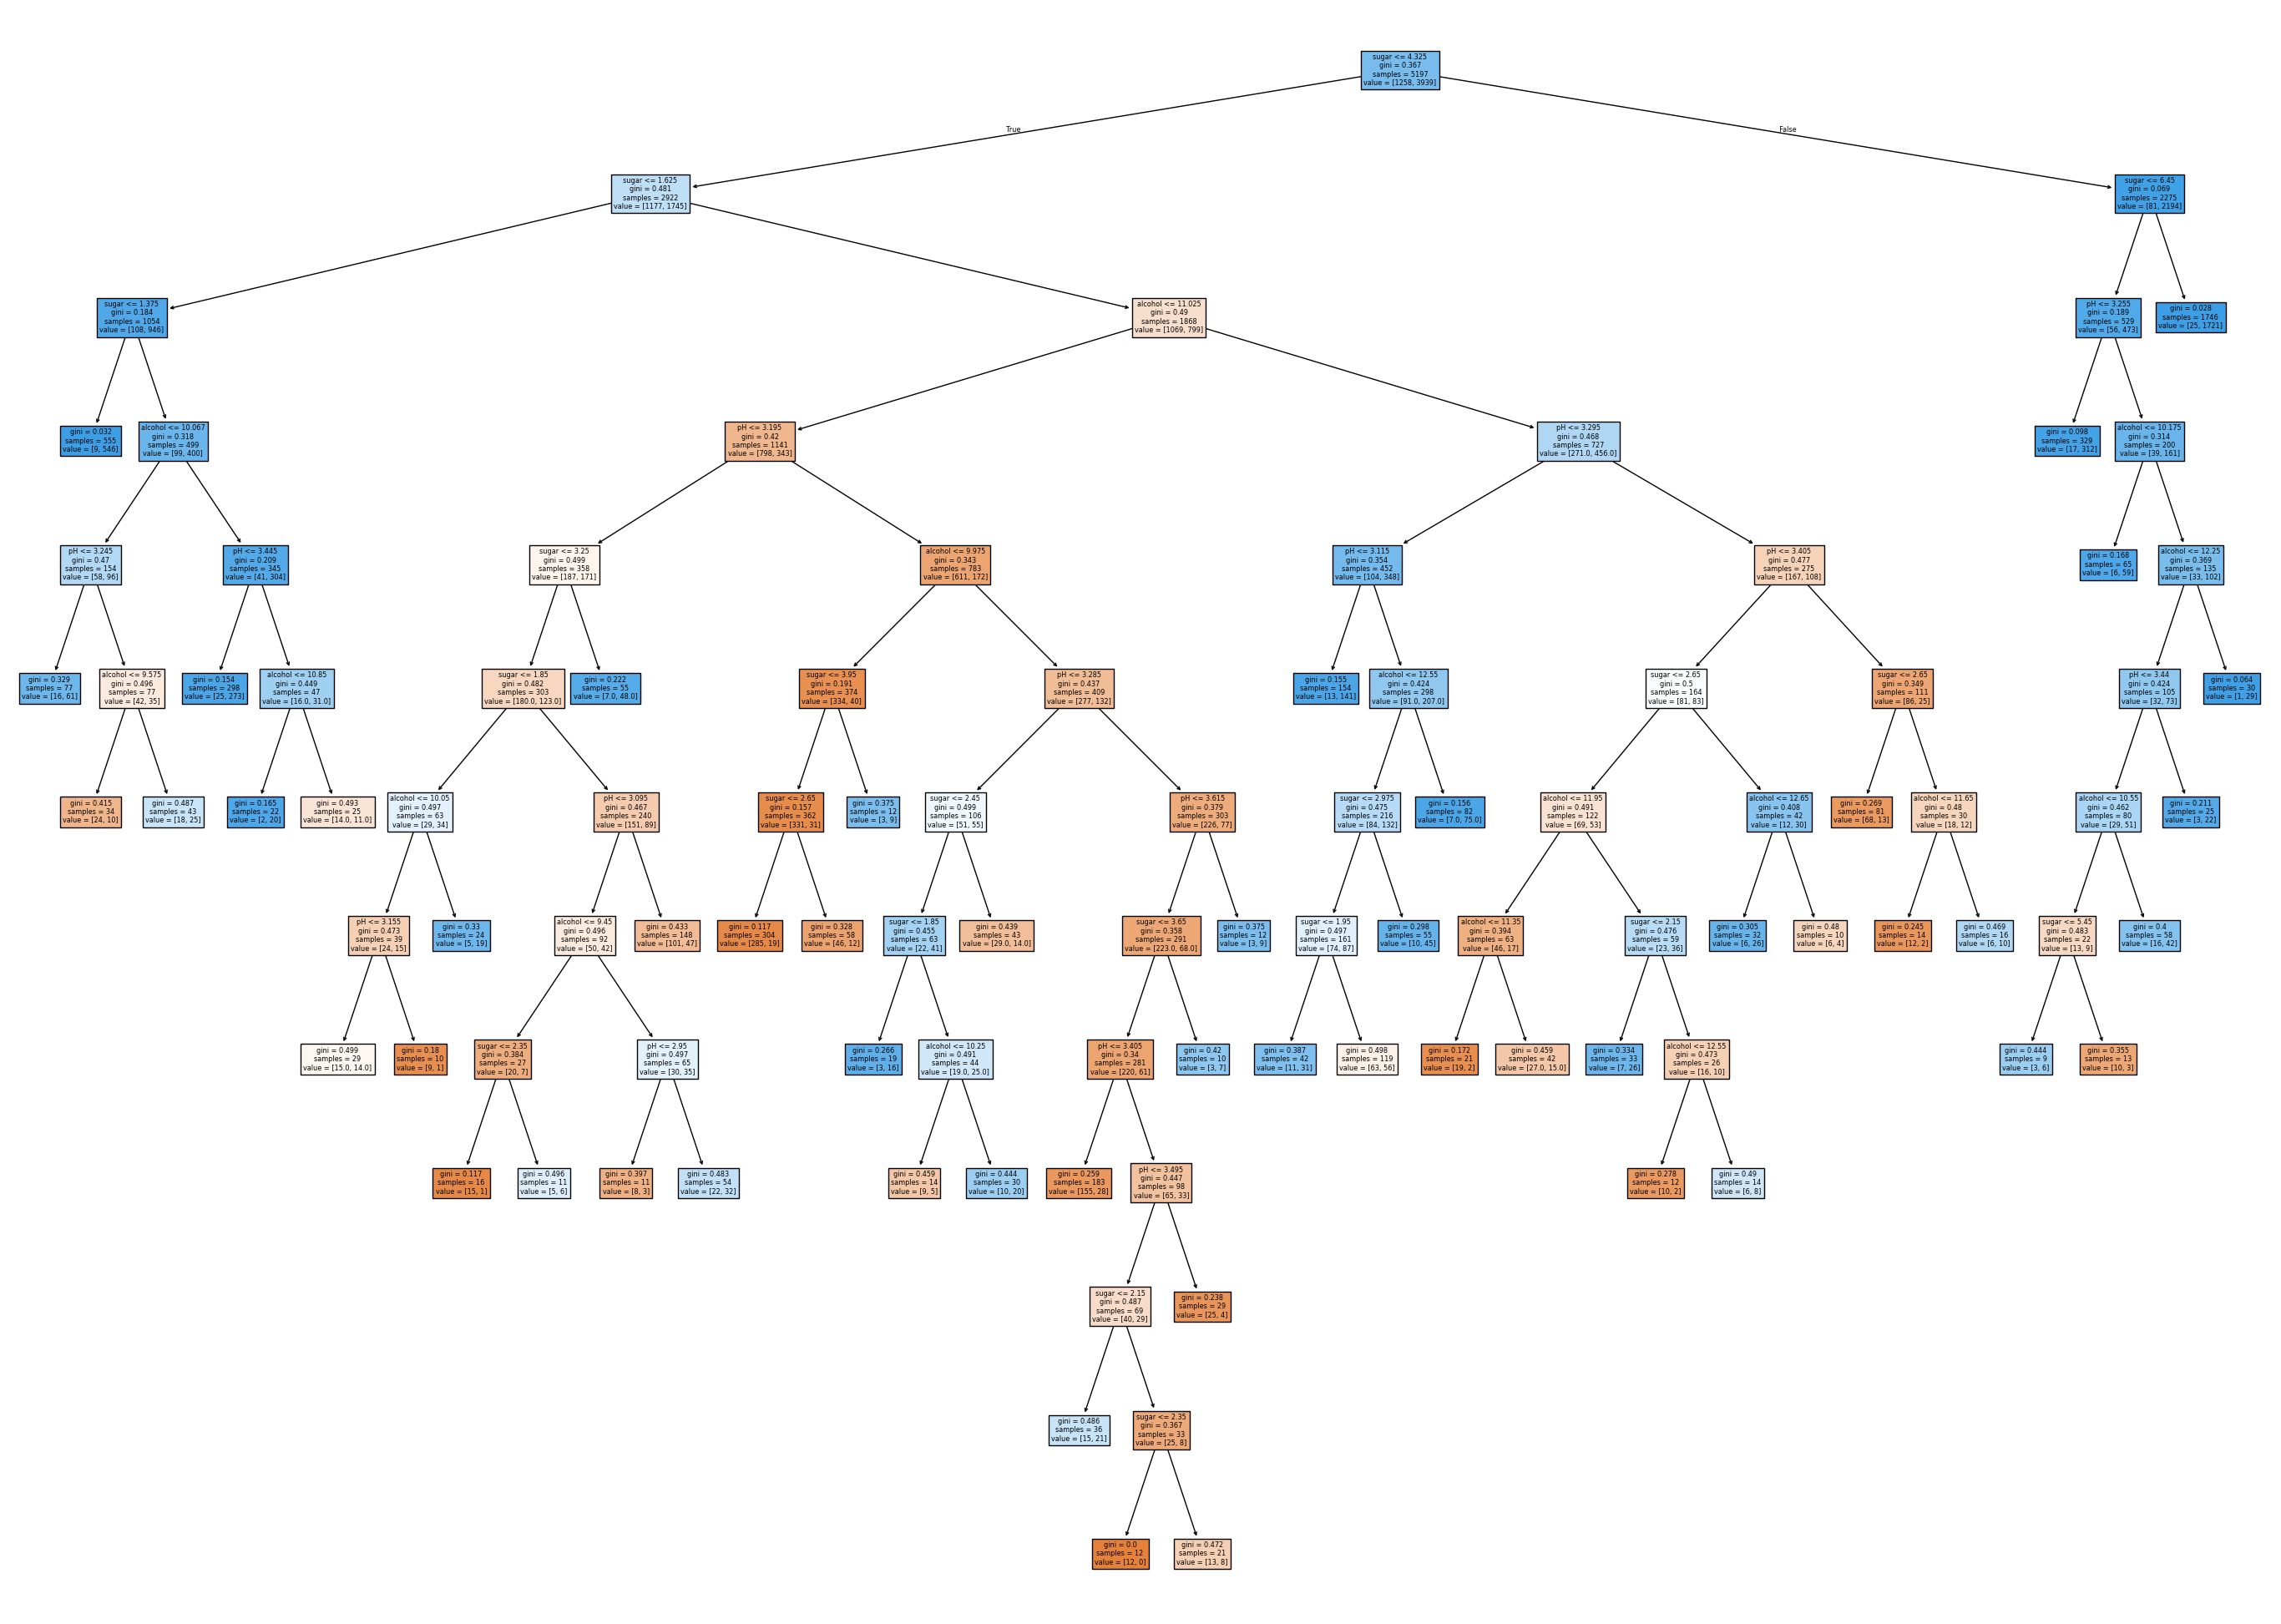

In [68]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# 1. 그래프 크기 설정 (너무 크면 메모리 점유율이 높으니 적절히 조절)
plt.figure(figsize=(35,25))
plot_tree(dt, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

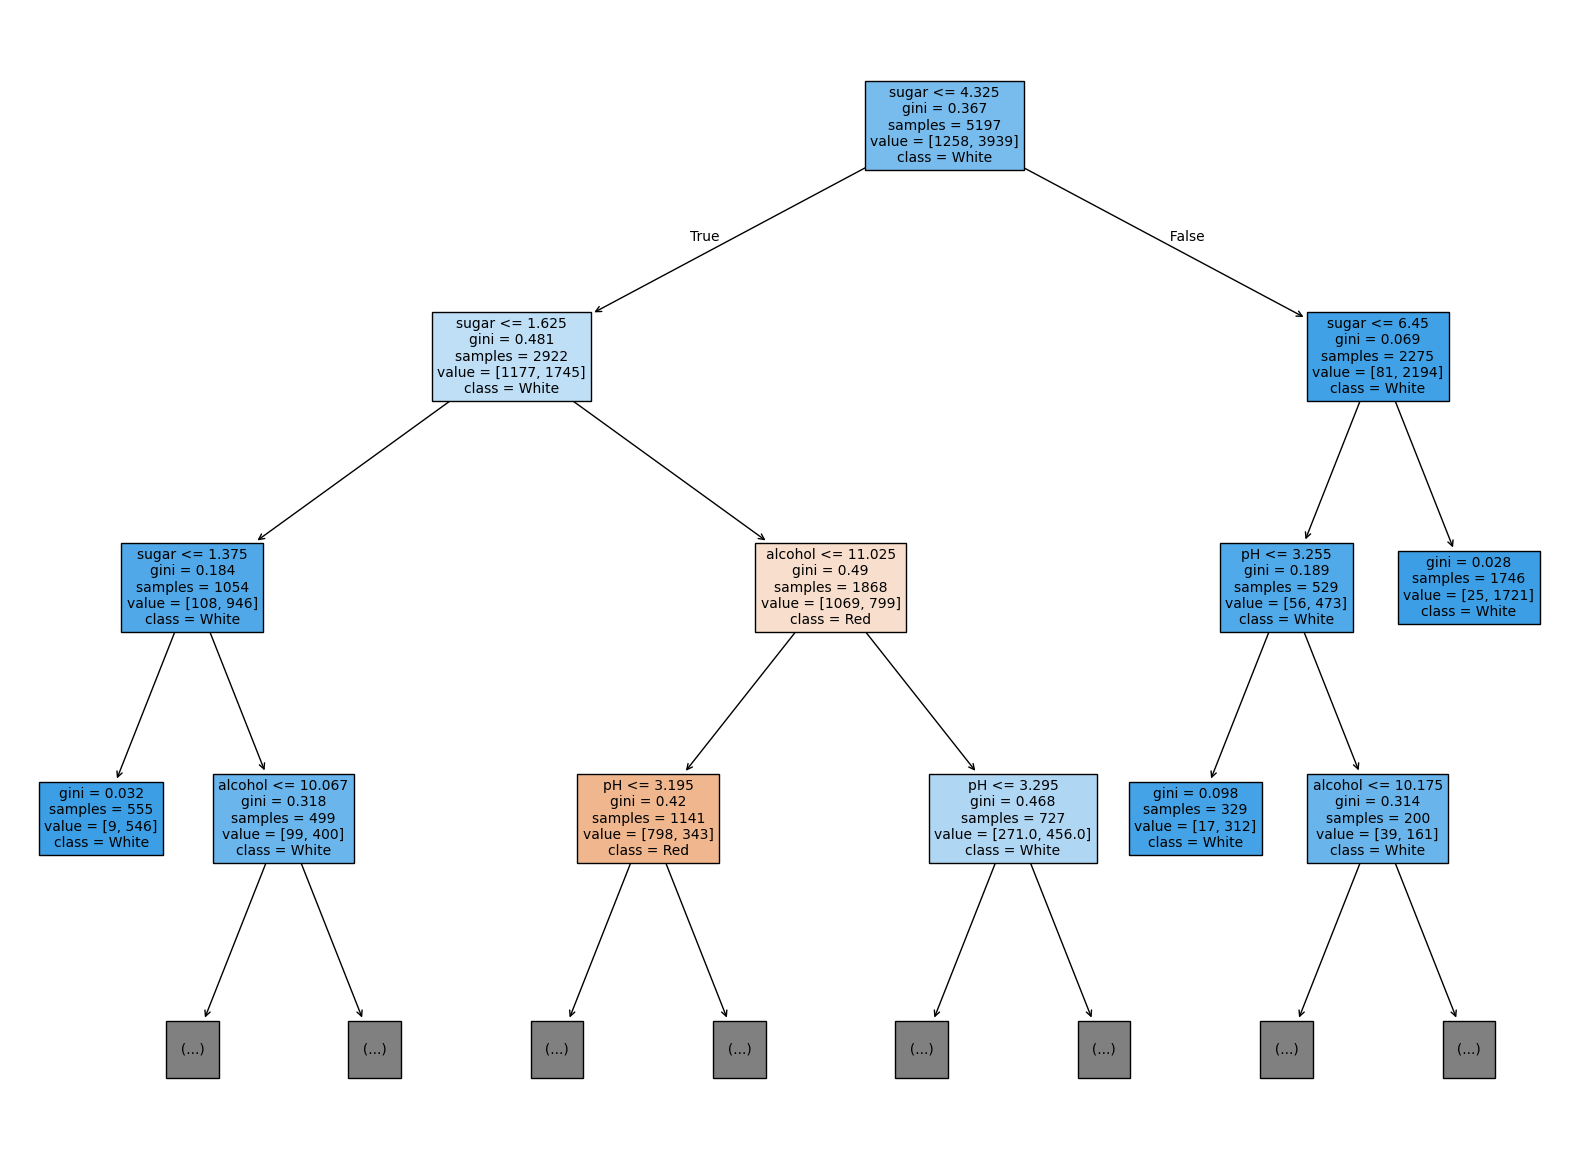

In [69]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# 1. 그래프 크기 설정 (너무 크면 메모리 점유율이 높으니 적절히 조절)
plt.figure(figsize=(20, 15))

# 2. 트리 시각화 수행
plot_tree(dt,
          max_depth=3,            # 너무 깊으면 다 안보이므로 상위 3단계만 시각화 (선택 사항)
          filled=True,            # 클래스 구분별 색상 채우기
          feature_names=['alcohol', 'sugar', 'pH'], # 변수 이름 매핑
          class_names=['Red', 'White'],           # 결과 클래스 이름 (예시)
          fontsize=10)            # 글꼴 크기 조절

plt.show() # 결과 화면 출력